In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

im = cv2.imread("M-06_Warren_sat.png")
im = cv2.imread("A-02_Minot_sat.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# plt.imshow(im)
# for i in range(5):
#     im = cv2.pyrDown(im)
ref_number = (int(im.shape[0] / 2), int(im.shape[1] / 2)) # center pixel
tolerance = 20 # tolerance range for pixel difference check

print(ref_number)

(177, 109)


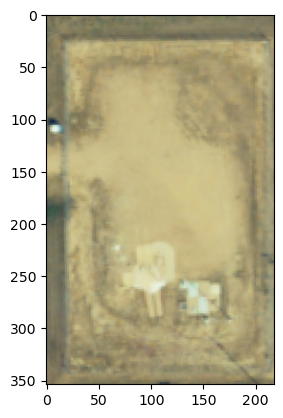

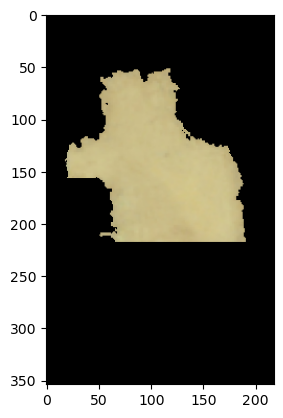

In [27]:
def get_adjacent(ref_number):
    adjacent_nums = []
    adjacent_nums.append((ref_number[0] - 1, ref_number[1]))
    adjacent_nums.append((ref_number[0] + 1, ref_number[1]))
    adjacent_nums.append((ref_number[0] - 1, ref_number[1] - 1))
    adjacent_nums.append((ref_number[0], ref_number[1] - 1))
    adjacent_nums.append((ref_number[0] + 1, ref_number[1] - 1))
    adjacent_nums.append((ref_number[0] - 1, ref_number[1] + 1))
    adjacent_nums.append((ref_number[0], ref_number[1] + 1))
    adjacent_nums.append((ref_number[0] + 1, ref_number[1] + 1))
    return adjacent_nums

def magic_wand(image, ref_number, tolerance):
    im = deepcopy(image)
    ref_pixel = im[*ref_number, :] # get and store reference pixel value
    contiguous_mask = np.zeros_like(im[:, :, 0]) # make an array of zeros in the shape of one of the color channels of the original image
    contiguous_mask[*ref_number] = 1 # mark the starting pixel as 1
    
    def mark_adjacent(ref_number):
        adjacent_nums = get_adjacent(ref_number) # get references of adjacent pixels
        for adjacent_num in adjacent_nums:
            if (adjacent_num[0] > 0) and (adjacent_num[1] > 0) and (adjacent_num[0] < image.shape[0]) and (adjacent_num[0] < image.shape[1]):
                current_ref_pixel = im[*adjacent_num, :]
                if (current_ref_pixel[0] > ref_pixel[0] - tolerance) and (current_ref_pixel[0] < ref_pixel[0] + tolerance) and (current_ref_pixel[1] > ref_pixel[1] - tolerance) and (current_ref_pixel[1] < ref_pixel[1] + tolerance) and (current_ref_pixel[2] > ref_pixel[2] - tolerance) and (current_ref_pixel[2] < ref_pixel[2] + tolerance):
                    contiguous_mask[adjacent_num] = 1
    i = 0
    while ref_number[0] + i < im.shape[0] - 1:
        j = 0
        while ref_number[1] + j < im.shape[1] - 1:
            if contiguous_mask[ref_number[0] + i, ref_number[1] + j] == 1:
                mark_adjacent((ref_number[0] + i, ref_number[1] + j))
            j = j + 1
        i = i + 1

    i = 0
    while ref_number[0] - i > 0:
        j = 0
        while ref_number[1] - j > 0:
            if contiguous_mask[ref_number[0] - i, ref_number[1] - j] == 1:
                mark_adjacent((ref_number[0] - i, ref_number[1] - j))
            j = j + 1
        i = i + 1

    i = 0
    while ref_number[0] - i > 0:
        j = 0
        while ref_number[1] + j < im.shape[1] - 1:
            if contiguous_mask[ref_number[0] - i, ref_number[1] + j] == 1:
                mark_adjacent((ref_number[0] - i, ref_number[1] + j))
            j = j + 1
        i = i + 1
        
    i = 0
    while ref_number[0] + i < im.shape[0] - 1:
        j = 0
        while ref_number[1] - j > 0:
            if contiguous_mask[ref_number[0] + i, ref_number[1] - j] == 1:
                mark_adjacent((ref_number[0] + i, ref_number[1] - j))
            j = j + 1
        i = i + 1
            
    return contiguous_mask


contiguous_mask = magic_wand(im, ref_number, tolerance)
new_im = cv2.bitwise_and(im, im, mask = contiguous_mask)
plt.imshow(im)
plt.show()
plt.imshow(new_im)